# Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Text Preprocessing
import string #
import re # Regular Expression
import pprint # Pretty Print for long texts
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [24]:
# Feature Engineering
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [31]:
# Text Classification
from sklearn.model_selection import train_test_split

In [4]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# File system
import os
# Warning
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [6]:
data = pd.read_csv('CSV_file/text_emotion.csv')
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


# Exploratory Data Analysis

## No. of Rows

In [7]:
data.shape

(40000, 4)

## Data Type

In [8]:
# data type
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

## Missing data

In [9]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

## Keyword

In [10]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:>

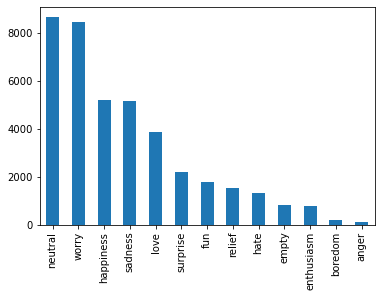

In [11]:
data['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

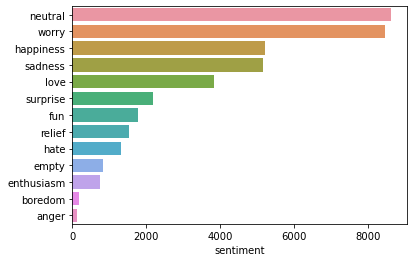

In [12]:
# frequency of sentiment terms
sns.barplot(y=data['sentiment'].value_counts().index, x=data['sentiment'].value_counts())

# Text Data Pre-Processing

In [13]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

## Preprocessor function

In [14]:
def text_preproc(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

data['content'] = data['content'].apply(lambda x: text_preproc(x))
data['content'][:5]

0    tiffanylue know listenin bad habit earlier sta...
1               layin n bed headache ughhhhwaitin call
2                        funeral ceremonygloomy friday
3                              wants hang friends soon
4    dannycastillo want trade someone houston ticke...
Name: content, dtype: object

## Emotions list

In [15]:
# Emotions list
emotions = data['sentiment'].unique().tolist()
emotions

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

## Anger keywords

In [16]:
# Anger list
anger_list = data[data['sentiment']=='anger']['content']
anger_list.value_counts().sum()

110

In [17]:
anger_list = ' '.join(anger_list)
# anger_list

In [18]:
anger_list.count('dont')

7

In [19]:
def unique_words(text):
    text = text.split()
    dict = {}
    dat = []
    for word in text:
        if word not in dat:
            dat.append(word)
    for i in dat:
        dict[i] = anger_list.count(i)
    return dict
anger_tokens = unique_words(anger_list)
# anger_tokens  
# ({'fuckinm': 1,
#  'transtelecom': 1,)

In [20]:
anger_tokens_sorted = dict(sorted(anger_tokens.items(), key=lambda x:x[1], reverse=True))
# anger_tokens_sorted

## Anger Plot

In [21]:
anger_keys = list(anger_tokens_sorted.keys())
anger_values = list(anger_tokens_sorted.values())

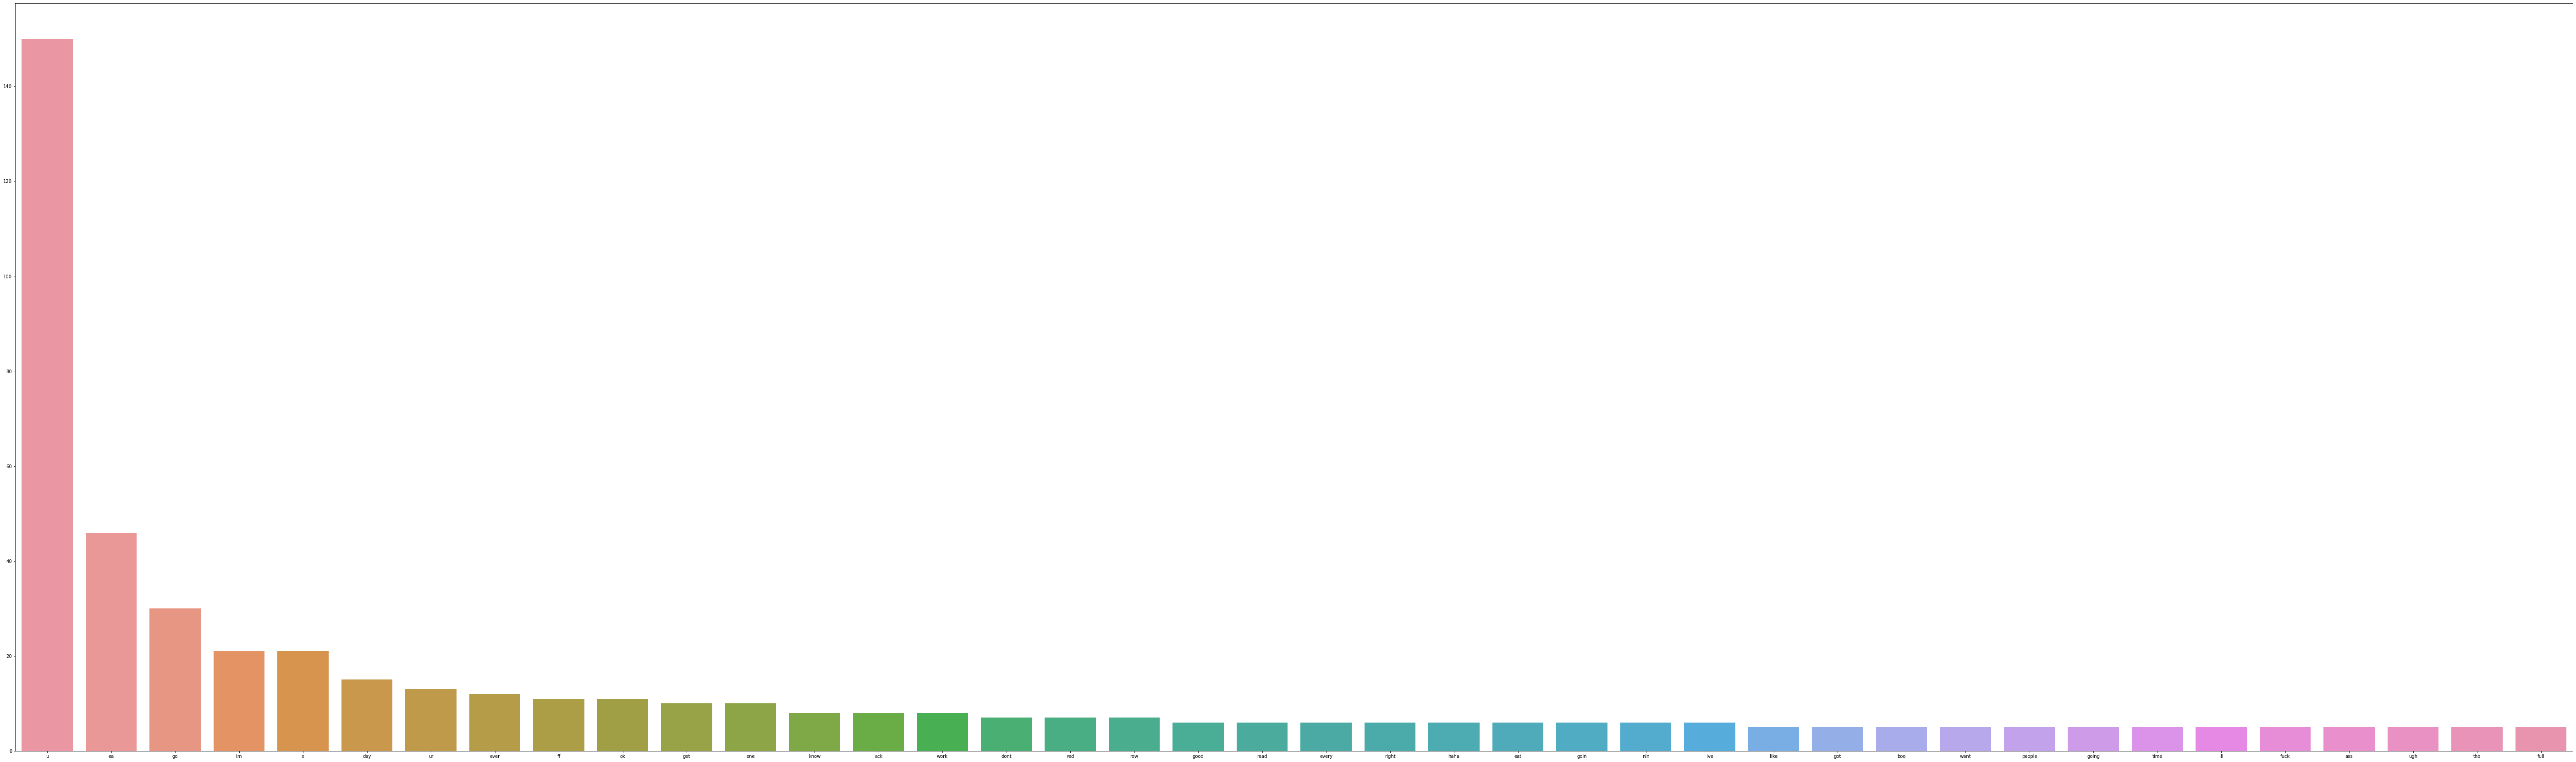

In [23]:
plt.figure(figsize=(100, 30))
sns.barplot(y=anger_values[:40], x=anger_keys[:40])
plt.show()

# Feature Engineering

## Bag of Words (Count Vectorizer)

In [28]:
# Splitting features and labels
x_features = data['content']
y_label = data['sentiment']

In [29]:
count_vectorizer = CountVectorizer()
X_vector = count_vectorizer.fit_transform(x_features) # Fitting vocabolary

In [34]:
count_vectorizer.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaahhhhhhhh',
 'aaaaaaaaaamazing',
 'aaaaaaaafternoon',
 'aaaaaaaahhhhhhhh',
 'aaaaaah',
 'aaaaaahhhhhhhh',
 'aaaaaalcohol',
 'aaaaaawwwesome',
 'aaaaahhhh',
 'aaaaall',
 'aaaaandnothin',
 'aaaaaoouoouoouu',
 'aaaaarrrrggghhh',
 'aaaaaw',
 'aaaaawwwwwww',
 'aaaagggessss',
 'aaaagh',
 'aaaah',
 'aaaahh',
 'aaaahhhh',
 'aaaale',
 'aaaargh',
 'aaaau',
 'aaaaw',
 'aaaawww',
 'aaaawwww',
 'aaah',
 'aaahaha',
 'aaahh',
 'aaahhh',
 'aaahhhh',
 'aaahhhjust',
 'aaalisson',
 'aaand',
 'aaargh',
 'aaarrrgh',
 'aaass',
 'aaauuuggghhh',
 'aaaw',
 'aaaww',
 'aaawww',
 'aac',
 'aaggh',
 'aah',
 'aahh',
 'aahhgi',
 'aahhh',
 'aahhhh',
 'aahs',
 'aampe',
 'aanddfilms',
 'aanneeb',
 'aannndd',
 'aannniieee',
 'aapko',
 'aaraddict',
 'aarg',
 'aargh',
 'aaron',
 'aaronbishop',
 'aaronhoskins',
 'aaronlhb',
 'aaronmarshmusic',
 'aaronmatthes',
 'aaronmbaer',
 'aaronob',
 'aaronovitch',
 'aaronstewart',
 'aaronwarner',
 'aarrgghh',
 'a

In [37]:
print(X_vector.todense()) # if its zero, it means its not repeated, if repeated then need to preserve the space

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Text Classification

## Naives Bayes